<a href="https://colab.research.google.com/github/Tdas-christ/Machine_Learning/blob/main/2348569_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DATASETS/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**INSPECTION OF STRUCTURE OF DATASET**

In [ ]:
data.shape

(7043, 21)

In [ ]:
column_dtypes = data.dtypes
print(column_dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


**HANDLING MISSING VALUES**

In [ ]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', 0.0).astype(float)

In [ ]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
empty_string_count = (data['TotalCharges'] == 0.0).sum()

In [ ]:
empty_string_count

11

In [ ]:
missing_values= np.where(data['TotalCharges']==0.0)[0]

In [ ]:
missing_values

array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754])

In [ ]:
data.drop(index=missing_values, inplace=True)

**HANDLING OUTLIERS**

<Axes: >

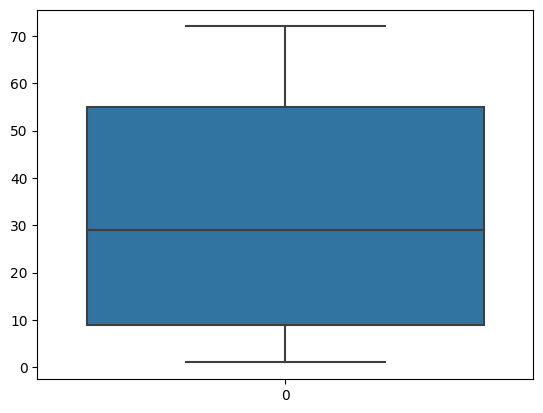

In [ ]:
sns.boxplot(data['tenure'])

<Axes: >

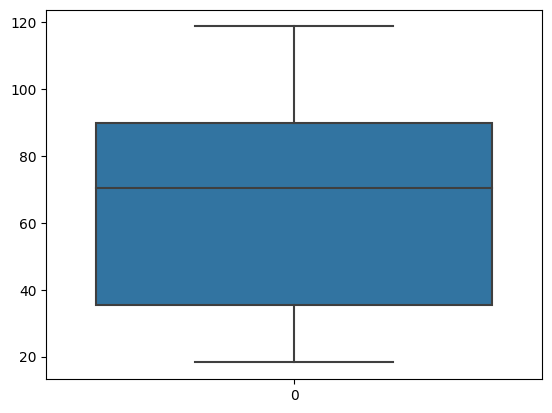

In [ ]:
sns.boxplot(data['MonthlyCharges'])

**LABEL ENCODING**

In [ ]:
data = data.drop(['customerID'], axis=1)

In [ ]:
num_data = data[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [ ]:
num_data.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [ ]:
cat_data = data[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X = cat_data.drop('Churn', axis=1)
X_encoded = pd.get_dummies(X)
Y = cat_data['Churn']

In [ ]:
Y_encoded = pd.get_dummies(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state = 42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

Y_pred = logreg.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)

Accuracy: 0.77
              precision    recall  f1-score   support

          No       0.83      0.87      0.84      1033
         Yes       0.57      0.49      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



In [ ]:
from sklearn.metrics import roc_auc_score, cohen_kappa_score, matthews_corrcoef


y_prob = logreg.predict_proba(X_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(Y_test, y_prob)
print("ROC AUC:", roc_auc)

# Calculate Cohen's Kappa Score
kappa_score = cohen_kappa_score(Y_test, Y_pred)
print("Cohen's Kappa Score:", kappa_score)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(Y_test, Y_pred)
print("Matthews Correlation Coefficient:", mcc)

ROC AUC: 0.8143186606685269
Cohen's Kappa Score: 0.37613250168303747
Matthews Correlation Coefficient: 0.3778450629742105


**CONFUSION MATRIX**

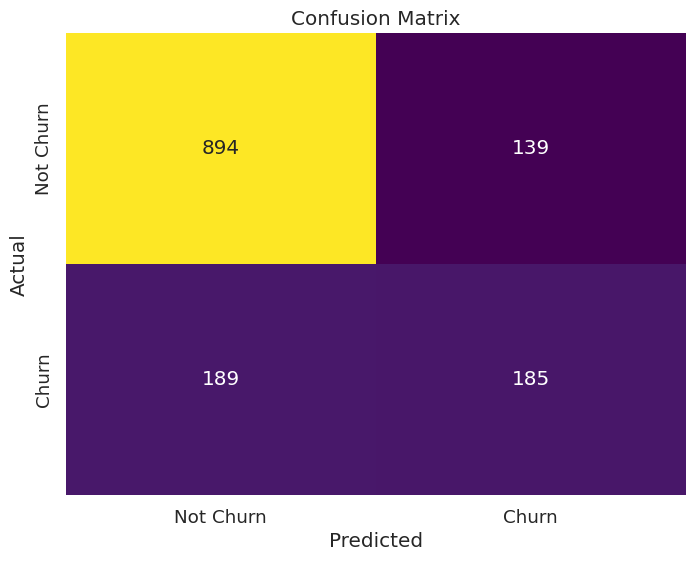

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=False,
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Plot the ROC curve and calculate the AUC**

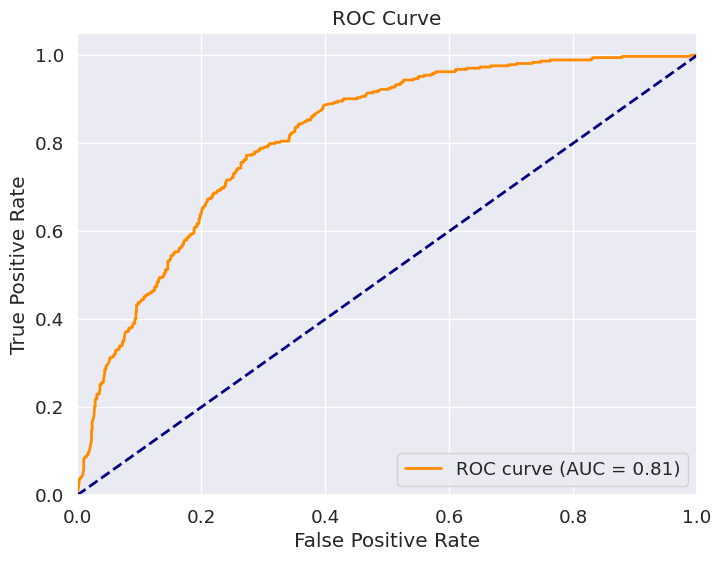

In [ ]:
from sklearn.metrics import roc_curve

Y_test_binary = Y_test.map({'No': 0, 'Yes': 1})
fpr, tpr, thresholds = roc_curve(Y_test_binary, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Visualize the precision-recall curve**

AUC-PR: 0.5764999900249748


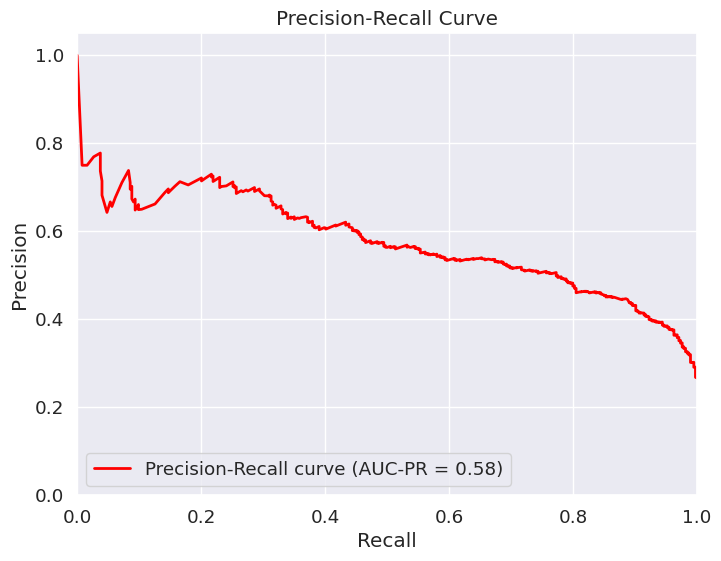

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(Y_test_binary, y_prob)

pr_auc = auc(recall, precision)
print("AUC-PR:", pr_auc)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='red', lw=2, label=f'Precision-Recall curve (AUC-PR = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

**Plot the log loss function curve during model training**

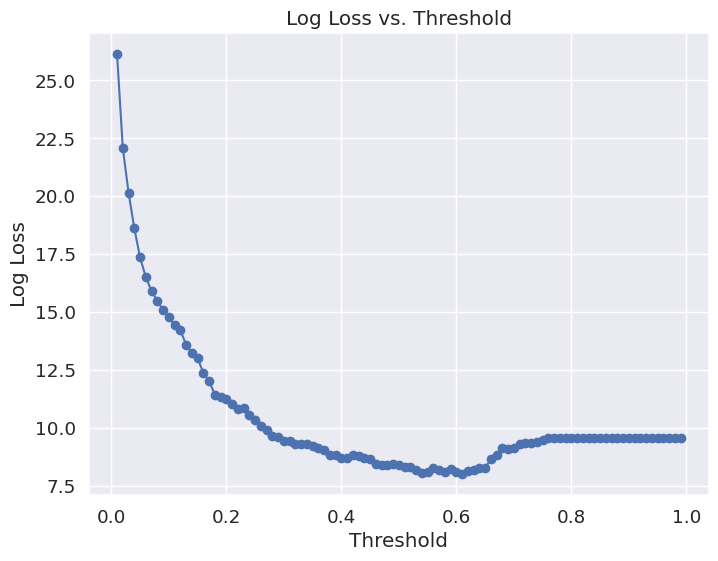

In [ ]:
from sklearn.metrics import log_loss

log_loss_values = []

thresholds = np.arange(0.01, 1, 0.01)

for threshold in thresholds:
    # Apply a threshold to the predicted probabilities
    y_pred_threshold = (y_prob > threshold).astype(int)

    # Calculate log loss
    loss = log_loss(Y_test, y_pred_threshold)

    # Append log loss to the list
    log_loss_values.append(loss)

# Plot log loss curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, log_loss_values, marker='o', linestyle='-', color='b')
plt.xlabel('Threshold')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Threshold')
plt.grid(True)
plt.show()


**Provide a clear visualization of the sigmoid (logistic) curve used in logistic regression.
Explain its significance.**

Text(-6, 0.2, 'Saturates at 0 and 1')

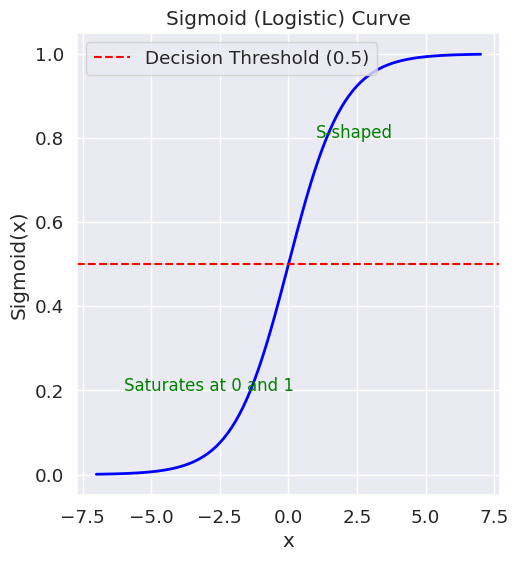

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-7, 7, 200)

# Calculate y values using the sigmoid function
y = sigmoid(x)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the sigmoid curve
plt.subplot(1, 2, 1)
plt.plot(x, y, color='blue', lw=2)
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Sigmoid (Logistic) Curve')
plt.grid(True)
plt.axhline(y=0.5, color='red', linestyle='--', label='Decision Threshold (0.5)')
plt.legend(loc='upper left')

# Highlight the significance in the plot
plt.text(1, 0.8, 'S-shaped', fontsize=12, color='green')
plt.text(-6, 0.2, 'Saturates at 0 and 1', fontsize=12, color='green')


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define hyperparameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Experiment with different C values
}

logreg = LogisticRegression()

# Perform hyperparameter tuning using grid search and cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a logistic regression model with the best hyperparameters
best_logreg = LogisticRegression(**best_params)
best_logreg.fit(X_train, Y_train)

# Evaluate the best model on the test set
Y_pred_best = best_logreg.predict(X_test)
classification_report_best = classification_report(Y_test, Y_pred_best)
print("Classification Report (Best Model):")
print(classification_report_best)

Best Hyperparameters: {'C': 10}
Classification Report (Best Model):
              precision    recall  f1-score   support

          No       0.83      0.86      0.84      1033
         Yes       0.57      0.49      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407

